<a href="https://colab.research.google.com/github/vincent51689453/Tensorflow2_Playground/blob/master/01_Keras_Handwritting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary python libraries**

In [38]:
import tensorflow as tf
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np 

print("Libraries are imported successfully")
print("Tensorflow version: ",tf.__version__)


Libraries are imported successfully
Tensorflow version:  2.2.0


Download and load MNIT dataset

In [12]:
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data() 

  
# Translation of data  
# Reshape to 60000 x (28 x 28 x1)
X_Train_keras = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test_keras = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')  

Features standardization and One-hot encoding



In [30]:
# Standardize feature data  
X_Train_keras_norm = X_Train_keras / 255  
X_Test_keras_norm = X_Test_keras /255  
      
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)



Create a convolutional neural network

In [14]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
      
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                     kernel_size=(5,5),  
                     padding='same',  
                     input_shape=(28,28,1),  
                     activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                  kernel_size=(5,5),  
                  padding='same',  
                  input_shape=(28,28,1),  
                  activation='relu'))  
      
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
      
# Add Dropout layer  
model.add(Dropout(0.25))  


Create a fully connected layer

In [15]:
model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
#Prevent overfitting
model.add(Dropout(0.5))  

#Ouput N-class probabilities
model.add(Dense(10, activation='softmax'))


model.summary()  
print("")  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

Starts to traing the CNN

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  

train_history = model.fit(x=X_Train_keras_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.5440 - accuracy: 0.8291 - val_loss: 0.1038 - val_accuracy: 0.9694
Epoch 2/10
 - 1s - loss: 0.1457 - accuracy: 0.9568 - val_loss: 0.0691 - val_accuracy: 0.9793
Epoch 3/10
 - 1s - loss: 0.1075 - accuracy: 0.9686 - val_loss: 0.0518 - val_accuracy: 0.9852
Epoch 4/10
 - 1s - loss: 0.0805 - accuracy: 0.9762 - val_loss: 0.0437 - val_accuracy: 0.9871
Epoch 5/10
 - 1s - loss: 0.0678 - accuracy: 0.9794 - val_loss: 0.0409 - val_accuracy: 0.9883
Epoch 6/10
 - 1s - loss: 0.0589 - accuracy: 0.9824 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 7/10
 - 1s - loss: 0.0553 - accuracy: 0.9835 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 8/10
 - 1s - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0345 - val_accuracy: 0.9908
Epoch 9/10
 - 1s - loss: 0.0444 - accuracy: 0.9869 - val_loss: 0.0354 - val_accuracy: 0.9905
Epoch 10/10
 - 1s - loss: 0.0408 - accuracy: 0.9880 - val_loss: 0.0341 - val_accuracy: 0.9902


Display Training History

In [20]:
import os  
      
      
import matplotlib.pyplot as plt  
def plot_image(image): 
    #get current figure 
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
      
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
      
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  


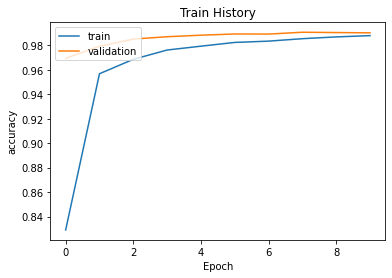

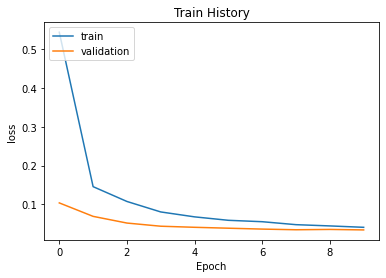

In [27]:
!pip3 install utils
from utils import *  

show_train_history(train_history, 'accuracy', 'val_accuracy')  
show_train_history(train_history, 'loss', 'val_loss')  

Test CNN

In [31]:
scores = model.evaluate(X_Test_keras_norm, y_TestOneHot)  
print()  
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 1s 64us/step

	[Info] Accuracy of testing data = 99.0%


[Info] Making prediction of X_Test4D_norm

[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



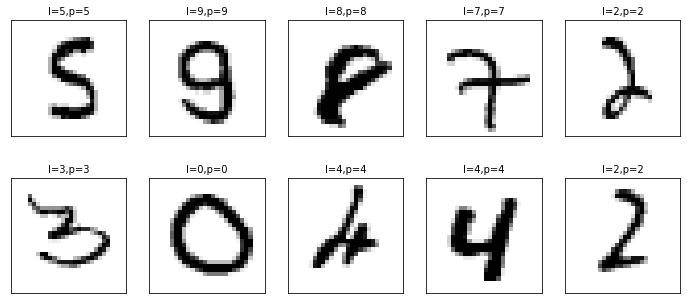

In [35]:
print("[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test_keras_norm)  # Making prediction and save result to prediction  
print()  
print("[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  

plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)  

In [36]:
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict']))  


	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        977     0     0     0    0    0    1     1    1    0
1          0  1129     1     2    0    0    0     1    2    0
2          1     1  1027     0    1    0    0     2    0    0
3          1     0     1  1004    0    1    0     2    1    0
4          0     1     0     0  976    0    0     1    1    3
5          2     0     0     7    0  881    1     0    0    1
6          7     2     0     0    2    1  946     0    0    0
7          0     1     7     2    0    0    0  1016    1    1
8          3     0     1     1    0    1    1     2  961    4
9          3     3     0     0    6    2    0     5    3  987

